# Training a neural network on MNIST with Keras

This simple example demonstrates how to plug TensorFlow Datasets (TFDS) into a Keras model.


Copyright 2020 The TensorFlow Datasets Authors, Licensed under the Apache License, Version 2.0

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/datasets/keras_example"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/keras_example.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/datasets/blob/master/docs/keras_example.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/datasets/docs/keras_example.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'emnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

2022-08-18 16:38:03.465303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-18 16:38:03.465505: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-18 16:38:03.465573: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (VirtDebian): /proc/driver/nvidia/version does not exist
2022-08-18 16:38:03.480070: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


12.25
16 5 6 9
9690


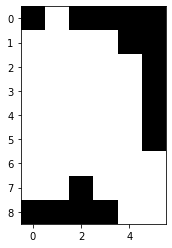

26 5 7 9
10200


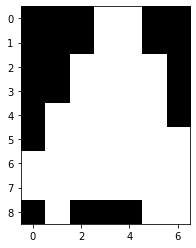

37 5 6 10
12240


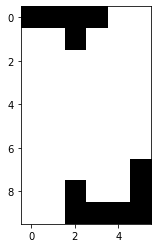

6 6 7 8
10455


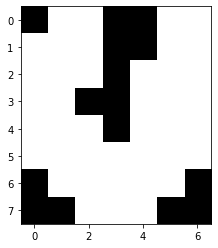

6 16 5 8
17 18 4 4
15 16 8 8
12495


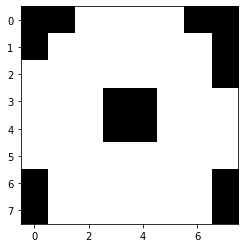

26 16 6 8
7905


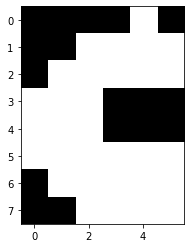

36 16 7 8
10455


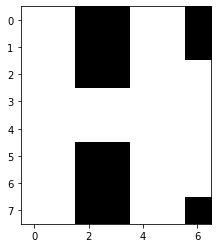

6 25 6 9
7395


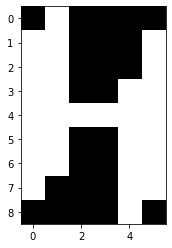

16 28 4 5
18 32 3 3
15 27 7 8
7395


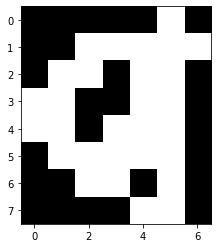

26 27 7 7
5100


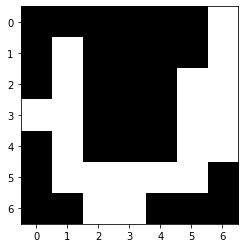

37 31 3 3
36 27 6 7
4335


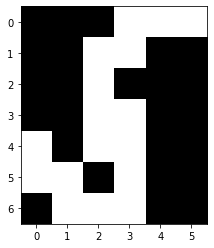

4 34 1 1
13 34 2 1
24 34 1 1
33 34 2 1
43 34 2 1
7 36 4 4
6 35 6 8
6630


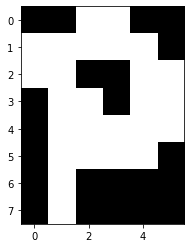

19 36 1 1
25 37 4 7
36 38 6 8
6630


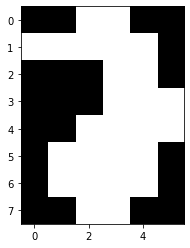

18 39 2 4
4 44 2 1
13 44 2 1
23 44 2 1
33 44 2 1
43 44 2 1


In [46]:
imageRead  = cv2.imread("TestBild6.png")
#        image = np.resize(imageRead, (112,112,3))
image = imageRead

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshInv = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 61, 20)

origSize = threshInv.shape[0]/4
print(origSize)

#       plt.imsave("gray.png", gray, cmap='gray')
#       plt.imsave("threshInv.png", threshInv, cmap='gray')

#Rechtecke ermitteln
contours, _ = cv2.findContours(threshInv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

rects = []
for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        rects.append((x,y,w,h))
rects.reverse()

words = []
letters = []

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 61, 20)
#       plt.imsave("thresh.png", thresh, cmap='gray')

alt_y = -1

stdDiff = 7

for r in rects:
        x,y,w,h = r
        print(x,y,w,h)

#               if (w >= 56 and w <= 60) and (h >= 53 and h <= 67):

        
        if (w >= (origSize - stdDiff) and w <= (origSize + stdDiff)) and (h >= (origSize - stdDiff) and h <= (origSize + stdDiff)):

                #jump to next word
                if y > alt_y and alt_y != -1:
                        words.append(letters)
                        letters = []

                if False: #uninverted image
                        #get single letter from big image
                        crop_img = thresh[y:y+h, x:x+w]
                        print(crop_img.sum())

                        #only take letters which are not blank
                        if crop_img.sum() < 753032:
                                letters.append(crop_img)
                                alt_y = y
                else: #inverted image
                        #get single letter from big image
                        crop_img = threshInv[y:y+h, x:x+w]
                        print(crop_img.sum())

                        plt.imshow(crop_img, cmap='gray')
                        plt.show()

                        #only take letters which are not blank
                        if crop_img.sum() > 0:
                                letters.append(crop_img)
                                alt_y = y

#append last Word, as there is no linebreak
words.append(letters)

(1, 28, 28, 1)


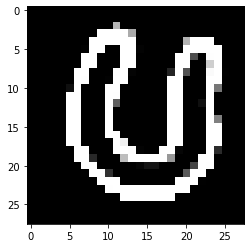

(1, 28, 28, 1)
Zeichen mapped S Wahrscheinlichkeit 0.35898083
(1, 28, 28, 1)


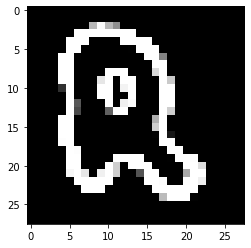

(1, 28, 28, 1)
Zeichen mapped n Wahrscheinlichkeit 0.17077096
(1, 28, 28, 1)


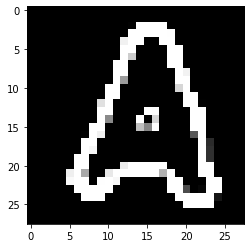

(1, 28, 28, 1)
Zeichen mapped a Wahrscheinlichkeit 0.9292726
(1, 28, 28, 1)


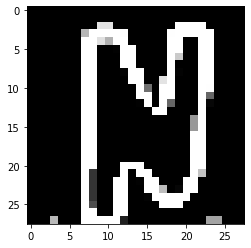

(1, 28, 28, 1)
Zeichen mapped D Wahrscheinlichkeit 0.9838155
(1, 28, 28, 1)


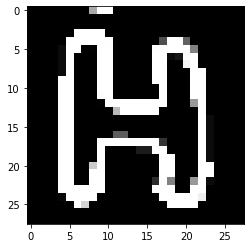

(1, 28, 28, 1)
Zeichen mapped X Wahrscheinlichkeit 0.91625494
(1, 28, 28, 1)


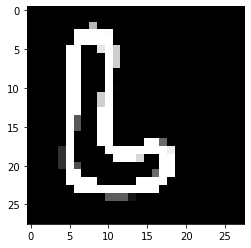

(1, 28, 28, 1)
Zeichen mapped 9 Wahrscheinlichkeit 0.49201727
(1, 28, 28, 1)


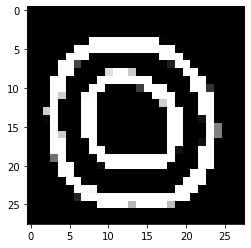

(1, 28, 28, 1)
Zeichen mapped n Wahrscheinlichkeit 0.6653103
(1, 28, 28, 1)


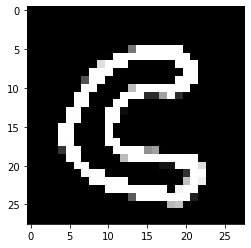

(1, 28, 28, 1)
Zeichen mapped n Wahrscheinlichkeit 0.6082636
(1, 28, 28, 1)


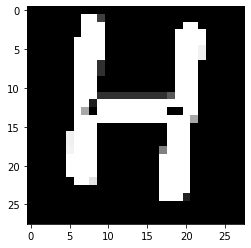

(1, 28, 28, 1)
Zeichen mapped Z Wahrscheinlichkeit 0.603942
(1, 28, 28, 1)


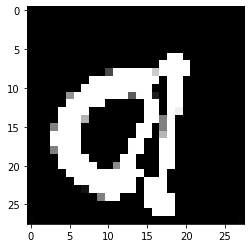

(1, 28, 28, 1)
Zeichen mapped p Wahrscheinlichkeit 0.54291344
(1, 28, 28, 1)


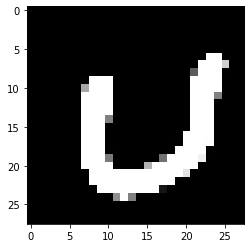

(1, 28, 28, 1)
Zeichen mapped S Wahrscheinlichkeit 0.5541049
(1, 28, 28, 1)


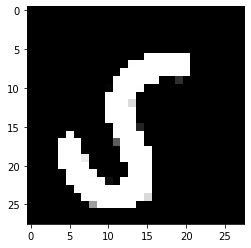

(1, 28, 28, 1)
Zeichen mapped P Wahrscheinlichkeit 0.92151153
(1, 28, 28, 1)


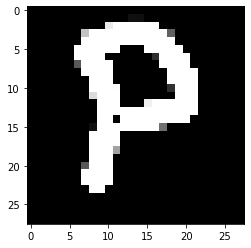

(1, 28, 28, 1)
Zeichen mapped 5 Wahrscheinlichkeit 0.74121445
(1, 28, 28, 1)


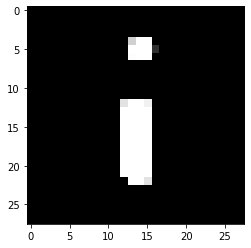

(1, 28, 28, 1)
Zeichen mapped t Wahrscheinlichkeit 0.9988129
(1, 28, 28, 1)


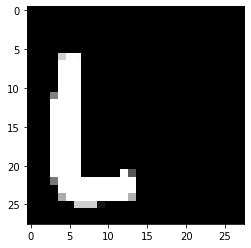

(1, 28, 28, 1)
Zeichen mapped P Wahrscheinlichkeit 0.5344235
(1, 28, 28, 1)


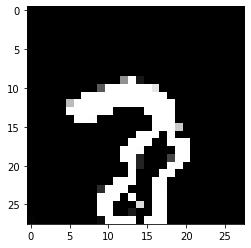

(1, 28, 28, 1)
Zeichen mapped M Wahrscheinlichkeit 0.85059977


In [44]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

charList = ['0','1','2','3','4','5','6','7','8','9',
'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

model = tf.keras.models.load_model('tfKerasCharsEMNISTSoftmax')
#model.summary()
    
#interate trough all letters of all words to the separated chars
for word in words:
        str = ''
        cnt = 0
        for l in word:
                imageArray = l
                
                #Bild von Eingangsgöße auf 28x28 skalieren
                resImage = cv2.resize(imageArray, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
                resImage = np.expand_dims(resImage, axis=(0, -1))
                #resImage = np.resize(imageArray,(1,28,28,1))
                #plt.imshow(resImage[0], cmap='gray') #Bilder sind gedreht und gespiegelt
                #plt.show()
                print(resImage.shape)
                #Daten von uint8 auf fp32 ändern und auf Werte von 0 bis 1 bringen
                normImage = resImage.astype(np.float32)/255
                plt.imshow(normImage[0], cmap='gray') #Bilder sind gedreht und gespiegelt
                plt.show()
                print(normImage.shape)

                #Netz ausführen
                output = model.predict(normImage)
                
                #Ergebnis aufbereiten
                print("Zeichen mapped", charList[np.argmax(output[0])], "Wahrscheinlichkeit", np.max(output[0]))
                str += charList[np.argmax(output[0])]

                del output
#        break
#       print(str)


In [9]:
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model('tfKerasCharsEMNISTSoftmax')
model.summary()

data = np.random.randint(0, 255, (1, 28, 28))/255

print(data.shape)
#print(data[1][1])

erg = model.predict(data)
#print(np.argmax(erg))
print(erg)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 62)                7998      
                                                                 
Total params: 108,478
Trainable params: 108,478
Non-trainable params: 0
_________________________________________________________________
(1, 28, 28)
[[1.8807922e-26 1.1773163e-32 2.5462825e-24 0.0000000e+00 0.0000000e+00
  5.7181509e-21 0.0000000e+00 2.3309642e-32 2.0760651e-34 6.2360591e-31
  1.1094535e-28 1.0451843e-15 6.5116700e-23 1.4345829e-15 0.0000000e+00
  7.4750385e-24 0.0000000e+00 3.4343622e-34 1.2634439e-37 3.6869738e-22
  2.6603500e-2

In [10]:
import numpy as np

interpreter = tf.lite.Interpreter(model_path="tfKerasCharsEMNISTSoftmax.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], data.astype(np.float32))
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[1.8809071e-26 1.1772804e-32 2.5463602e-24 0.0000000e+00 0.0000000e+00
  5.7179756e-21 0.0000000e+00 2.3308929e-32 2.0759382e-34 6.2358687e-31
  1.1094197e-28 1.0451842e-15 6.5120670e-23 1.4344953e-15 0.0000000e+00
  7.4748089e-24 0.0000000e+00 3.4343622e-34 1.2633669e-37 3.6868610e-22
  2.6602685e-24 3.1925078e-26 8.2440706e-13 9.8908077e-17 1.6950796e-29
  1.9003130e-20 1.1458955e-19 1.8751120e-25 4.3014879e-16 9.3877919e-23
  1.0000000e+00 4.7501616e-36 6.8858677e-13 8.0936305e-27 2.5868643e-16
  6.4011163e-22 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 5.3476571e-30 6.2545880e-33 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.5340980e-32 0.0000000e+00 1.7737309e-31
  0.0000000e+00 0.0000000e+00 0.0000000e+00 6.3624169e-34 0.0000000e+00
  2.0836627e-22 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
